<a href="https://colab.research.google.com/github/godlygodzilla/nn_and_dl/blob/main/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-07-04 07:55:55--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   169MB/s    in 0.8s    

2023-07-04 07:55:56 (169 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2023-07-04 07:55:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [21]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [22]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [23]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

['horse49-2.png', 'horse26-2.png', 'horse20-9.png', 'horse33-4.png', 'horse22-0.png', 'horse41-7.png', 'horse12-8.png', 'horse22-5.png', 'horse12-1.png', 'horse49-9.png']
['human13-19.png', 'human15-03.png', 'human10-05.png', 'human10-25.png', 'human03-25.png', 'human13-25.png', 'human16-17.png', 'human05-29.png', 'human17-04.png', 'human07-21.png']
VAL SET HORSES: ['horse4-556.png', 'horse3-584.png', 'horse1-298.png', 'horse5-514.png', 'horse3-141.png', 'horse2-201.png', 'horse2-254.png', 'horse2-544.png', 'horse3-070.png', 'horse1-204.png']
VAL SET HUMANS: ['valhuman02-06.png', 'valhuman01-24.png', 'valhuman04-12.png', 'valhuman05-07.png', 'valhuman04-09.png', 'valhuman04-13.png', 'valhuman02-22.png', 'valhuman04-10.png', 'valhuman05-17.png', 'valhuman03-23.png']


In [24]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

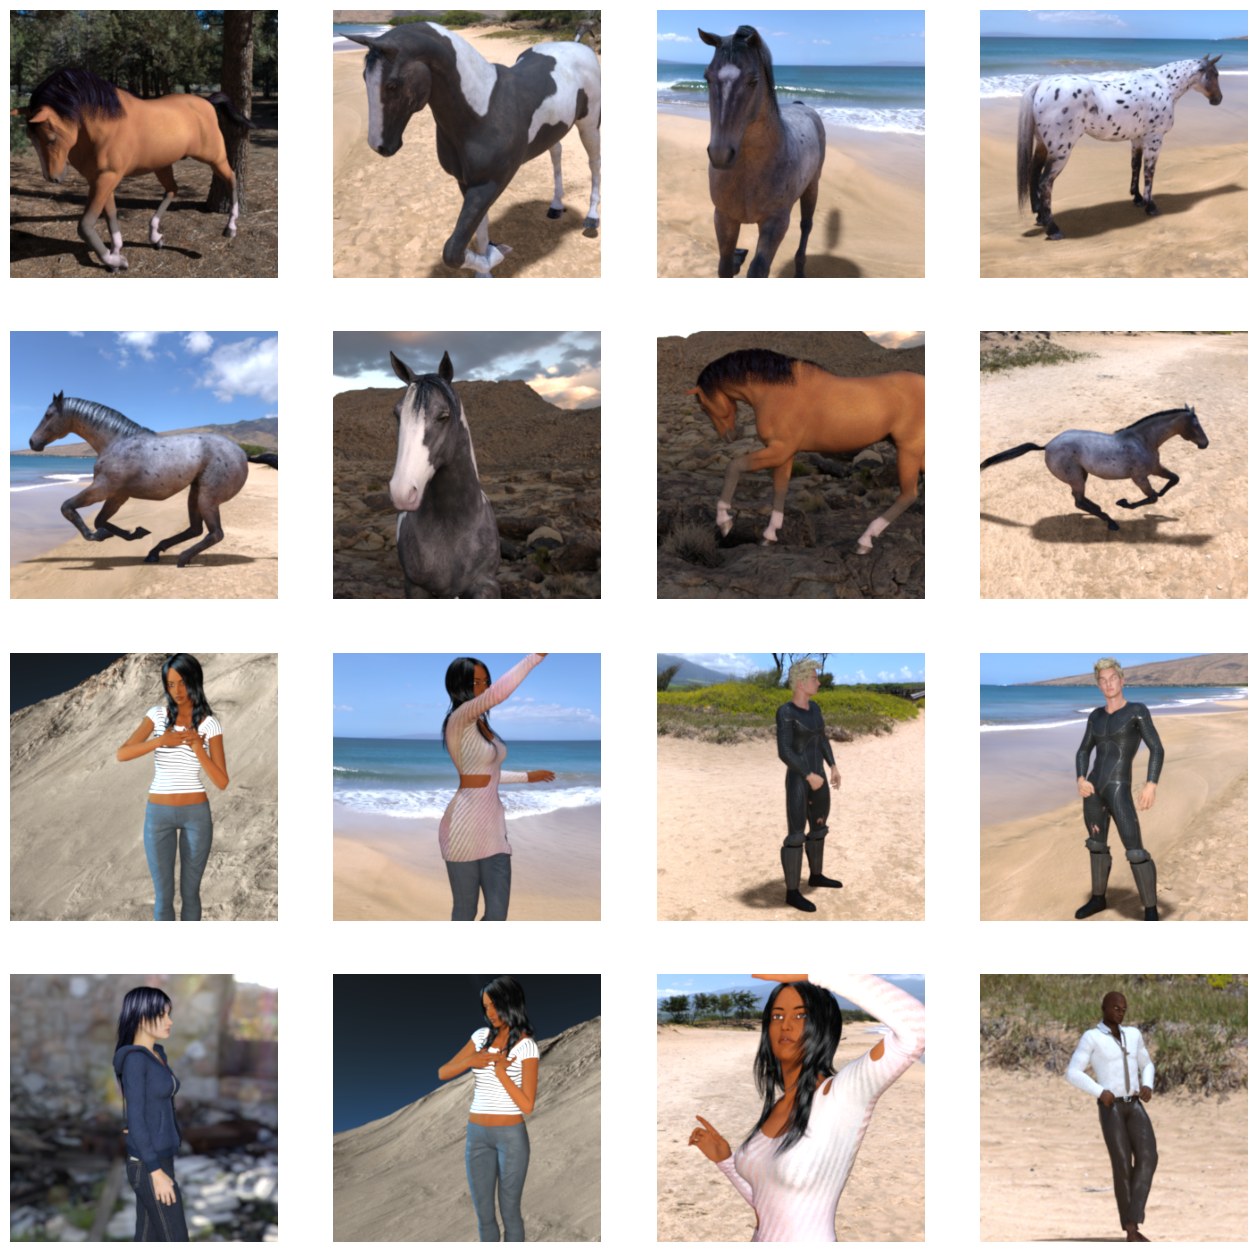

In [26]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [27]:
training_datagen= ImageDataGenerator(rescale=1/255)
validation_datagen= ImageDataGenerator(rescale=1/255)

training_set=training_datagen.flow_from_directory("./horse-or-human/",target_size=(300,300),batch_size=128,class_mode="binary")

validation_set=validation_datagen.flow_from_directory('./validation-horse-or-human/',target_size=(300, 300),batch_size=32,class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [28]:
model=keras.Sequential([keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(32,(3,3),activation="relu"),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(64,(3,3),activation="relu"),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(64,(3,3),activation="relu"),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(64,(3,3),activation="relu"),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(512,activation="relu"),
                        keras.layers.Dense(1,activation="sigmoid")
                        ])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=["accuracy"])

In [31]:
model.fit(training_set,steps_per_epoch=8,epochs=15,validation_data=validation_set,validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 993ms/step - loss: 0.8614 - accuracy: 0.5127 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6826 - accuracy: 0.5451 - val_loss: 0.6622 - val_accuracy: 0.8281
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6339 - accuracy: 0.6162 - val_loss: 0.5904 - val_accuracy: 0.7031
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.7688 - accuracy: 0.7308 - val_loss: 0.3636 - val_accuracy: 0.8789
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.5077 - accuracy: 0.8350 - val_loss: 1.1724 - val_accuracy: 0.5391
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.4682 - accuracy: 0.7676 - val_loss: 0.7196 - val_accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.4896 - accuracy: 0.8354 - val_loss: 0.5236 - val_accuracy: 0.8125
Epoch 8/15
8/8 [=====================

In [33]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving woman-gbf06eb91e_640.jpg to woman-gbf06eb91e_640.jpg
1/1 [==============================] - 0s 18ms/step
[8.646658e-05]
woman-gbf06eb91e_640.jpg is a horse
